In [2]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [3]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_corridor


# maze = gym.make('corridor-100-v0')
maze = gym.make('corridor-40-v0')
# maze = gym.make('corridor-20-v0')

maze.reset()
maze.render()


[X......................................$]


In [6]:
from lcs.agents.xcs import XCS, Configuration


# TODO: fix it.
def xcs_corridor_knowledge(xcs: XCS, environment):
    nr_correct = 0
    position = 0
    while environment.observation_space.contains(position):
        if any([True for cl in xcs.population if cl.does_match(str(position)) and
                                                 cl.action == 1 and
                                                 cl.wildcard_number() == 0]):
            nr_correct += 1
        if any([True for cl in xcs.population if cl.does_match(str(position)) and
                                                 cl.action == 0 and
                                                 cl.wildcard_number() == 0]):
            nr_correct += 1
        
        position += 1
    return nr_correct / position


def xcs_corridor_metrics(xcs: XCS, environment):
    return {
        'population': len(xcs.population),
        'knowledge': xcs_corridor_knowledge(xcs, environment),
        'numerosity': sum(cl.numerosity for cl in xcs.population)
    }


cfg = Configuration(number_of_actions=2,
                    metrics_trial_frequency=10,
                    user_metrics_collector_fcn=xcs_corridor_metrics)

agent = XCS(cfg)
explore_population, explore_metrics = agent.explore(maze, 1000, False)

for cl in explore_population:
    print(str(cl))


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 200, 'reward': 1.1852769172425365e-40, 'population': 76, 'knowledge': 1.9, 'numerosity': 94}
INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 146, 'reward': 100.01431483549064, 'population': 74, 'knowledge': 1.825, 'numerosity': 196}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 68, 'reward': 100.00020814852137, 'population': 78, 'knowledge': 1.95, 'numerosity': 200}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 20, 'reward': 100.00000000032148, 'population': 76, 'knowledge': 1.875, 'numerosity': 200}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 71, 'reward': 100.01332456146258, 'population': 78, 'knowledge': 1.95, 'numerosity': 198}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 38, 'reward': 100.0, 'population': 78, 'knowledge': 1.95, 'numerosity': 200}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 50, 'reward': 100.0, 'population': 78, 'knowledge': 1.95, 'numerosity': 200}
INFO:lc

Cond:1 - Act:0 - Num:3 [fit: 0.002, exp: 362.00, pred: 0.000]
Cond:28 - Act:0 - Num:1 [fit: 0.000, exp: 345.00, pred: 0.808]
Cond:2 - Act:0 - Num:5 [fit: 0.000, exp: 163.00, pred: 0.000]
Cond:7 - Act:0 - Num:3 [fit: 0.000, exp: 121.00, pred: 0.001]
Cond:24 - Act:0 - Num:1 [fit: 0.000, exp: 323.00, pred: 0.199]
Cond:12 - Act:0 - Num:7 [fit: 0.000, exp: 176.00, pred: 0.003]
Cond:0 - Act:0 - Num:3 [fit: 0.000, exp: 84.00, pred: 0.000]
Cond:38 - Act:1 - Num:5 [fit: 0.000, exp: 0.00, pred: 0.000]
Cond:16 - Act:0 - Num:3 [fit: 0.000, exp: 181.00, pred: 0.011]
Cond:15 - Act:0 - Num:3 [fit: 0.000, exp: 174.00, pred: 0.008]
Cond:9 - Act:1 - Num:1 [fit: 0.000, exp: 337.00, pred: 0.002]
Cond:7 - Act:1 - Num:3 [fit: 0.000, exp: 255.00, pred: 0.001]
Cond:8 - Act:1 - Num:3 [fit: 0.000, exp: 279.00, pred: 0.001]
Cond:6 - Act:1 - Num:3 [fit: 0.000, exp: 222.00, pred: 0.001]
Cond:5 - Act:1 - Num:3 [fit: 0.000, exp: 176.00, pred: 0.001]
Cond:4 - Act:1 - Num:3 [fit: 0.000, exp: 156.00, pred: 0.000]
Cond:

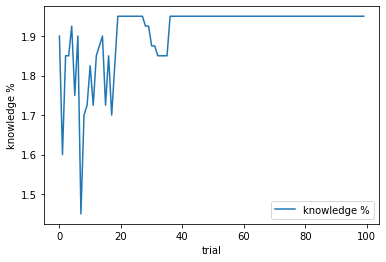

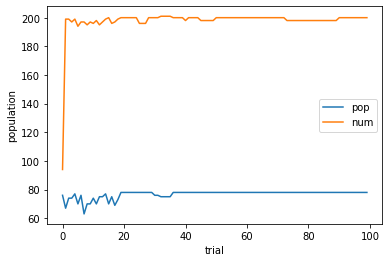

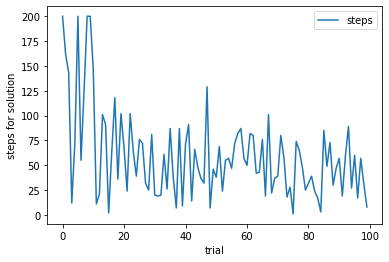

In [7]:
import pandas as pd

df = pd.DataFrame(metric["knowledge"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("knowledge %")
ax.legend(["knowledge %"])


df = pd.DataFrame(zip([metric["population"] for metric in explore_metrics], [metric["numerosity"] for metric in explore_metrics]))
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["pop", "num"])

df = pd.DataFrame(metric["steps_in_trial"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps for solution")
ax.legend(["steps"])





